<a href="https://colab.research.google.com/github/ProjectXMG999/ProjectXMG999-NLP-Text-generation-classification/blob/main/Sentiment_tweaking_the_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tweaking the model

- padding, embedding dimensions
- flatten vs. global average pooling
- dataset of reviews from amazon and yelp
- using projector tensorflow for visualize data

In [1]:
import tensorflow as tf

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [2]:
!wget --no-check-certificate \
    https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P \
    -O /tmp/sentiment.csv

--2023-03-09 21:15:46--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 172.253.119.139, 172.253.119.102, 172.253.119.101, ...
Connecting to drive.google.com (drive.google.com)|172.253.119.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dahpipav4gbk6nbpehi8jjahlpu1aiup/1678396500000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=c112e3dd-aa3d-4e33-b224-1cfe2e8f12ec [following]
--2023-03-09 21:15:46--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dahpipav4gbk6nbpehi8jjahlpu1aiup/1678396500000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=c112e3dd-aa3d-4e33-b224-1cfe2e8f12ec
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 173.194.193.132, 2607:f8b0:4001:c0f::84
Connecting to d

In [3]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/tmp/sentiment.csv')

sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [4]:
# tokenize the dataset with tweaks

In [5]:


vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"



tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [6]:
# train the model
# using GlobalAveragePooling1D instead of Flatten().


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 8,109
Trainable params: 8,109
Non-trainable params: 0
_________________________________________________________________


In [7]:
num_epochs = 30
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/30
50/50 [==============================] - 5s 30ms/step - loss: 0.6925 - accuracy: 0.5072 - val_loss: 0.6966 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 1s 20ms/step - loss: 0.6898 - accuracy: 0.5223 - val_loss: 0.6971 - val_accuracy: 0.4135
Epoch 3/30
50/50 [==============================] - 1s 18ms/step - loss: 0.6851 - accuracy: 0.5417 - val_loss: 0.6949 - val_accuracy: 0.4361
Epoch 4/30
50/50 [==============================] - 1s 11ms/step - loss: 0.6783 - accuracy: 0.5725 - val_loss: 0.6869 - val_accuracy: 0.4962
Epoch 5/30
50/50 [==============================] - 1s 10ms/step - loss: 0.6684 - accuracy: 0.6604 - val_loss: 0.6890 - val_accuracy: 0.4837
Epoch 6/30
50/50 [==============================] - 0s 8ms/step - loss: 0.6555 - accuracy: 0.6466 - val_loss: 0.6651 - val_accuracy: 0.6216
Epoch 7/30
50/50 [==============================] - 0s 7ms/step - loss: 0.6384 - accuracy: 0.7207 - val_loss: 0.6594 - val_accuracy: 0.5714
Epoch 8/30
50/5

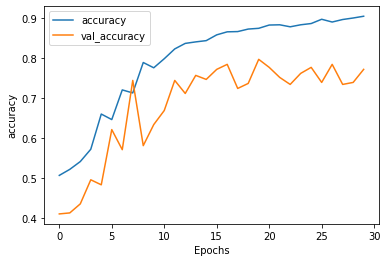

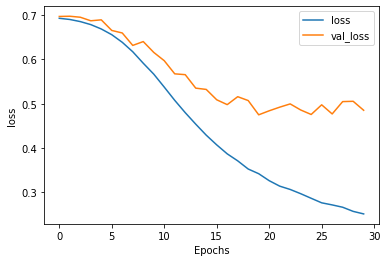

In [8]:
import matplotlib.pyplot as plt

# visualize the training and val accuracy

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [9]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(500, 16)


In [10]:
import io

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [11]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

http://projector.tensorflow.org/

- You may run into errors with the projection if your vocab_size earlier was larger than the actual number of words in the vocabulary, in which case you'll need to decrease this variable and re-train in order to visualize.

# predicting Sentiment in new reviews

In [12]:
# Use the model to predict a review   
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

print(fake_reviews) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')              

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')


['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

1/1 [==============================] - 0s 107ms/step
I love this phone
[0.9055747]


I hate spaghetti
[0.12491312]


Everything was cold
[0.5450147]


Everything was hot exactly as I wanted
[0.3697208]


Everything was green
[0.5450147]


the host seated us immediately
[0.54025275]


they gave us free chocolate cake
[0.84946567]


not sure about the wilted flowers on the table
[0.06490508]


only works when I stand on tippy toes
[0.8544977]


does not work when I stand on my head
[0.03636108]


